In [1]:
#-------------Exploring different types of data(N,O,I,R)-----------------------
import pandas as pd
df=pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Kolkata', 'Delhi'],          #Nominal
                'Satisfaction':[1,2,3,5],    #Ordinal
'Temperature': [22.5, 27.4, 28, 14],         #Interval
'Income': [20000, 45000, 68900, 56000]})     #Ratio

print(df.dtypes)          #If one or more entries are missing, they are shown as NaN
print(df.describe(include='all'))         #Missing values as NaN, use df['Satisfaction'].dropna() to drop, .isna().sum() for total number.

City             object
Satisfaction      int64
Temperature     float64
Income            int64
dtype: object
         City  Satisfaction  Temperature        Income
count       4      4.000000     4.000000      4.000000
unique      3           NaN          NaN           NaN
top     Delhi           NaN          NaN           NaN
freq        2           NaN          NaN           NaN
mean      NaN      2.750000    22.975000  47475.000000
std       NaN      1.707825     6.470639  20758.191154
min       NaN      1.000000    14.000000  20000.000000
25%       NaN      1.750000    20.375000  38750.000000
50%       NaN      2.500000    24.950000  50500.000000
75%       NaN      3.500000    27.550000  59225.000000
max       NaN      5.000000    28.000000  68900.000000


In [15]:
# Handling Missing and dirty data
import numpy as np
import pandas as pd
df= pd.DataFrame({'age':[22, 25, np.nan, 30, 28, 34],
                  'salary':[30000, 50000, 45000, np.nan, 60000, 52000]})
# 1. Check missing data
print("Missing Data:\n", df.isnull().sum())

# 2. Imputation
df['age']= df['age'].fillna(df['age'].mean())      #mean imputation
df['salary']= df['salary'].fillna(df['salary'].median())    #median imputation
print("After imputation: \n", df)
# 3. Outlier Detection
q1=df['salary'].quantile(0.25)
q3=df['salary'].quantile(0.75)
iqr= q3-q1

lower=q1 - 1.5*iqr
upper=q3 + 1.5*iqr

outliers=df[(df['salary']< lower)
    |(df['salary']>upper)]
print("Outliers are:\n", outliers)

# 3. Deletion of missing data
df_drop_salary= df.dropna(subset=['salary']) #Rows with missing values in specific columns deleted
print("After deletion:\n",df_drop_salary)     #not deleted since values already assigned
#pandas can't delete single cell, removes rows or columns
# use df_drop=df.dropna() print("After deletion:", df_drop)

Missing Data:
 age       1
salary    1
dtype: int64
After imputation: 
     age   salary
0  22.0  30000.0
1  25.0  50000.0
2  27.8  45000.0
3  30.0  50000.0
4  28.0  60000.0
5  34.0  52000.0
Outliers are:
     age   salary
0  22.0  30000.0
4  28.0  60000.0
After deletion:
     age   salary
0  22.0  30000.0
1  25.0  50000.0
2  27.8  45000.0
3  30.0  50000.0
4  28.0  60000.0
5  34.0  52000.0


In [11]:
# Min-Max Normalization(0 to 1)

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df[['age_norm', 'salary_norm']]= scaler.fit_transform(df[['age', 'salary']])
print("Min-Max normalized:\n", df)

Min-Max normalized:
     age   salary  age_norm  salary_norm
0  22.0  30000.0  0.000000     0.000000
1  25.0  50000.0  0.250000     0.666667
2  27.8  45000.0  0.483333     0.500000
3  30.0  50000.0  0.666667     0.666667
4  28.0  60000.0  0.500000     1.000000
5  34.0  52000.0  1.000000     0.733333


In [13]:
# Standardization (Mean=0, Std.=1)
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
df[['age_std', 'salary_std']]= std.fit_transform(df[['age', 'salary']])

print("Standardized:\n", df)

Standardized:
     age   salary  age_norm  salary_norm   age_std  salary_std
0  22.0  30000.0  0.000000     0.000000 -1.542786   -1.951918
1  25.0  50000.0  0.250000     0.666667 -0.744793    0.237149
2  27.8  45000.0  0.483333     0.500000  0.000000   -0.310118
3  30.0  50000.0  0.666667     0.666667  0.585195    0.237149
4  28.0  60000.0  0.500000     1.000000  0.053200    1.331682
5  34.0  52000.0  1.000000     0.733333  1.649185    0.456056


In [4]:
import pandas as pd
import numpy as np
df1= pd.DataFrame({ 'Circlename':["Telangana Circle", "Telangana Circle", "Telangana Circle", "Telangana Circle"],
                    'Regionname':["Hyderabad", "Hyderabad", "Hyderabad", "Hyderabad"],
                    'Officename':["Kothimir B.O", "Papanpet B.O", "Kukuda B.O", "Bareguda B.O"],
                    'Pincode': [504273, 504299, 504299, 504296],
                    'Latitude':[19.3638689, 19.4764899, np.nan , 19.3285752],
                    'Population': [15000, 6708, 32000, 12574]})
#1. Basic data analysis
print("A. View data:\n", df1.head())     #view data
print("B. Summary:\n", df1.describe())   # summary stats
print("C. Correlation:\n", df1.corr(numeric_only=True))     # correlation

A. View data:
          Circlename Regionname    Officename  Pincode   Latitude  Population
0  Telangana Circle  Hyderabad  Kothimir B.O   504273  19.363869       15000
1  Telangana Circle  Hyderabad  Papanpet B.O   504299  19.476490        6708
2  Telangana Circle  Hyderabad    Kukuda B.O   504299        NaN       32000
3  Telangana Circle  Hyderabad  Bareguda B.O   504296  19.328575       12574
B. Summary:
              Pincode   Latitude    Population
count       4.000000   3.000000      4.000000
mean   504291.750000  19.389645  16570.500000
std        12.579746   0.077253  10859.356319
min    504273.000000  19.328575   6708.000000
25%    504290.250000  19.346222  11107.500000
50%    504297.500000  19.363869  13787.000000
75%    504299.000000  19.420179  19250.000000
max    504299.000000  19.476490  32000.000000
C. Correlation:
              Pincode  Latitude  Population
Pincode     1.000000  0.388297    0.128891
Latitude    0.388297  1.000000   -0.868328
Population  0.128891 -0.868

In [6]:
#Simple Linear Regression

df1['Latitude']= pd. to_numeric(df1['Latitude'], errors='coerce')
df1['Latitude']= df1['Latitude'].fillna(df1['Latitude'].mean())

X = df1[['Pincode']]
y =df1['Latitude']

from sklearn.linear_model import LinearRegression
import numpy as np

model= LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("Predictions:", model.predict(X))

Coefficient: [0.00179753]
Intercept: -887.0909306440465
Predictions: [19.35594094 19.40267677 19.40267677 19.39728418]


In [7]:
# Multiple LR

#Predict latitude from pincode and population
X_multi = df1[['Pincode', 'Population']]
y1= df1['Latitude']

multi= LinearRegression()
multi.fit(X_multi,y1)

print("Coefficients:", multi.coef_)
print("Intercept:", multi.intercept_)

Coefficients: [ 2.01082245e-03 -1.91697902e-06]
Intercept: -994.6197618924509


In [8]:
import numpy as np
result=[5,4,3,4,5,3,5,4,2,3,4,2,3,1,5,2,1,4,1,2,4]
temp=[31,32,45,12,23,45]
sorted_result=sorted(result)
print(sorted_result)
print(np.mean(result))
print(np.median(result))
print(np.mean(temp))

[1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5]
3.1904761904761907
3.0
31.333333333333332


In [9]:
squared_differences=[]
for i in temp:
    diff= i-np.mean(temp)
squared_difference=diff**2
squared_differences.append(squared_difference)
avg_sqd=np.mean(squared_differences)
standard_deviation=np.sqrt(avg_sqd)
print(standard_deviation)

13.666666666666668


In [10]:
#geometric mean
num_items=len(temp)
product=1

for i in temp:
    product*=i
geo_mean=product**(1/num_items)
print(geo_mean)

28.662075145783213


In [11]:
import pandas as pd

list=[1,2,3,4,5,6,7,8]
series=pd.Series(list)
print(series)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
dtype: int64


In [14]:
dict1={'state':['Assam', 'Delhi', 'Kerala'], 'GArea':[76589, 56794, 75436], 'VADF':[3657, 5735, 6863]}
print(dict1)
dframe=pd.DataFrame(dict1)
print(dframe)

{'state': ['Assam', 'Delhi', 'Kerala'], 'GArea': [76589, 56794, 75436], 'VADF': [3657, 5735, 6863]}
    state  GArea  VADF
0   Assam  76589  3657
1   Delhi  56794  5735
2  Kerala  75436  6863


In [21]:

#2nd table
marks=pd.DataFrame([[1, 'Arnab', 16, 58], [2, 'Kritika', 32, 67], [3, 'Drashti', 24, 82],[4, 'Azad', 67,36], [5, 'Daniela', 57, 85]], columns=['Roll No.', 'Name', 'Eco', 'Maths'])
marks['Pass']=(marks['Maths']>45)
marks

,Roll No.,Name,Eco,Maths,Pass
0,1,Arnab,16,58,True
1,2,Kritika,32,67,True
2,3,Drashti,24,82,True
3,4,Azad,67,36,False
4,5,Daniela,57,85,True


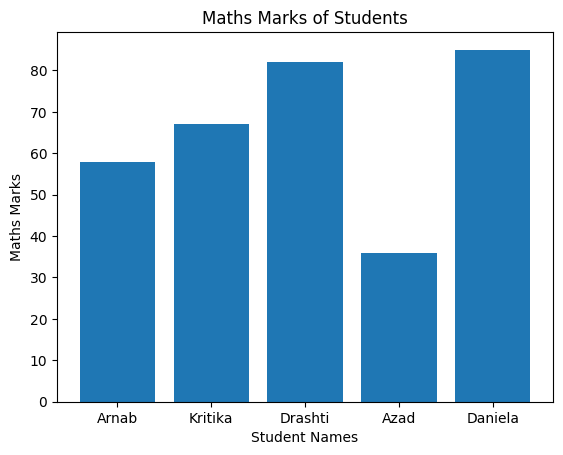

In [22]:
import matplotlib.pyplot as plt
plt.bar(marks['Name'], marks['Maths'])
plt.xlabel("Student Names")
plt.ylabel("Maths Marks")
plt.title("Maths Marks of Students")
plt.show()

In [28]:
import pandas as pd
data={0:[1, 2,3,4,5], 'TV':[230.1, 44.5, 17.2, 151.5, 180.8], 'Radio':[37.8, 39.3, 45.9, 41.3, 10.8], 'News':[69.2,45.1,69.3,58.5,58.4], 'Sales':[22.2, 10.4, 9.3,18.5,12.9]}
df2=pd.DataFrame(data)
df2.to_csv("Advertising.csv", index=False)
df2=pd.read_csv("Advertising.csv")
print(df2.head())
#del column
df2.drop(df2.columns[0], axis=1,inplace=True)
df2.corr()

   0     TV  Radio  News  Sales
0  1  230.1   37.8  69.2   22.2
1  2   44.5   39.3  45.1   10.4
2  3   17.2   45.9  69.3    9.3
3  4  151.5   41.3  58.5   18.5
4  5  180.8   10.8  58.4   12.9


,TV,Radio,News,Sales
TV,1.000000,-0.478276,0.285756,0.857584
Radio,-0.478276,1.000000,0.166737,0.036445
News,0.285756,0.166737,1.000000,0.363963
Sales,0.857584,0.036445,0.363963,1.000000


In [29]:
#LR
from sklearn.linear_model import LinearRegression
x1= df2[["TV"]]
y1= df2[["Sales"]]
print(x1.head())
model=LinearRegression()
model.fit(x1,y1)

      TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8


LinearRegression()

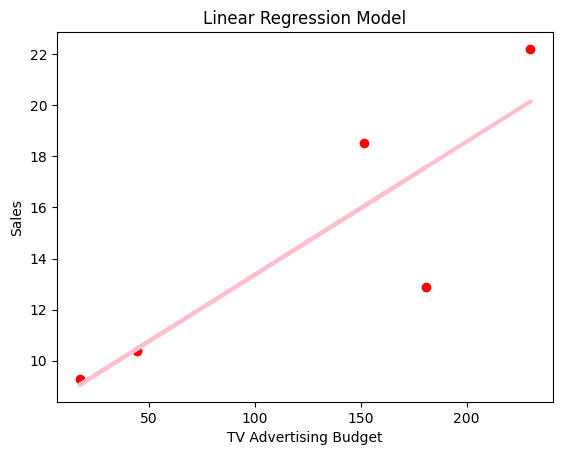

In [31]:
a_1=model.coef_
a_0=model.intercept_
plt.scatter(x1,y1,color='red')
plt.plot(x1,a_0+a_1*x1, color='pink', linewidth=3)
plt.title('Linear Regression Model')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.show()

In [33]:
print(model.coef_)
print(a_0)

[[0.05208121]]
[8.15922324]


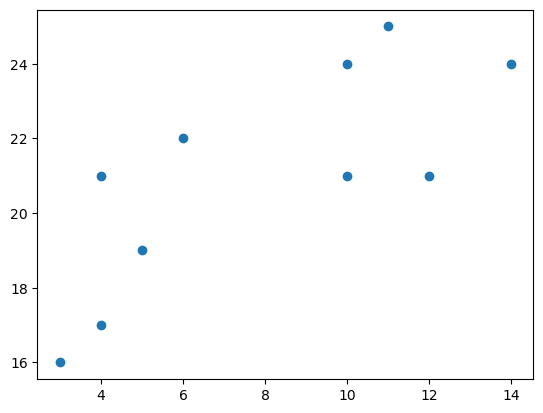

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x3 = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y3 = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x3, y3)           #Scatter plot visualizes the data distribution prior to applying K-means clustering.
plt.show()

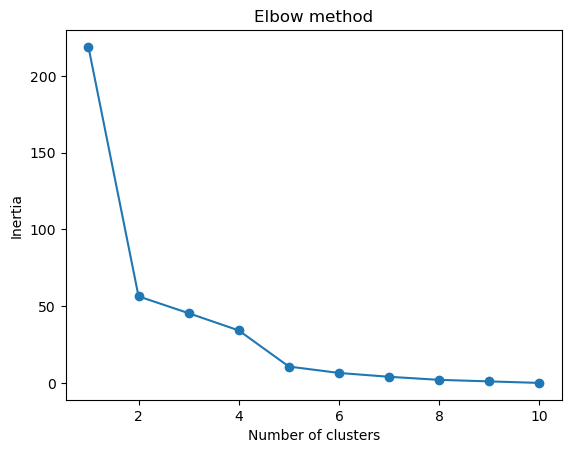

In [4]:
from sklearn.cluster import KMeans

data3 = list(zip(x3, y3))           # Using the elbow method to determine the optimal number of clusters for K-means.
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data3)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [40]:
del list

In [44]:
from sklearn.linear_model import LinearRegression

x4= df2[['TV', 'Radio']]
y4= df2['Sales']
multi4= LinearRegression()
multi4.fit(x4,y4)

print("Coefficients:", multi.coef_)
print("Intercept:", multi.intercept_)

Coefficients: [ 2.01082245e-03 -1.91697902e-06]
Intercept: -994.6197618924509


In [49]:
predicted_Sales=multi4.predict(pd.DataFrame([[100,150]],columns=['TV','Radio']))
print(predicted_Sales)

[39.39772356]


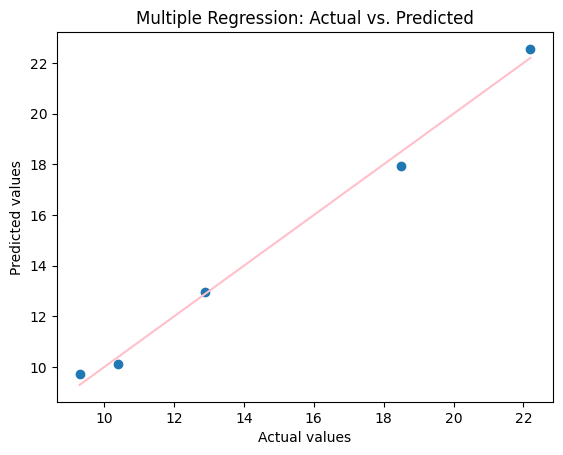

In [55]:
import matplotlib.pyplot as plt
y_pred=multi4.predict(x4)
plt.scatter(y4, y_pred)
plt.plot([y4.min(), y4.max()],[y4.min(),y4.max()], color='pink')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Multiple Regression: Actual vs. Predicted")
plt.show()

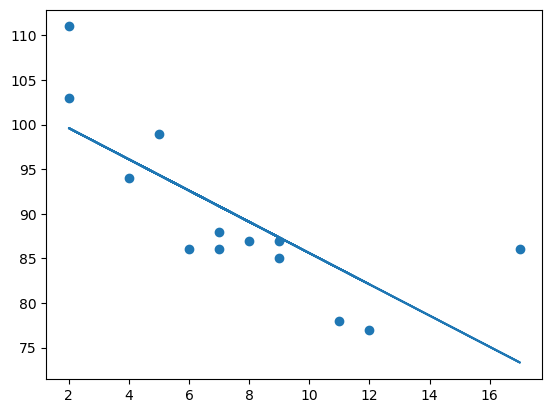

In [5]:
import matplotlib.pyplot as plt
from scipy import stats

x5 = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y5 = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x5, y5)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x5))                 #Estimating a linear relationship between x5 and y5 using least squares regression

plt.scatter(x5, y5)
plt.plot(x5, mymodel)
plt.show()